In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [167]:
data = pd.read_csv('FEA-FPU50-tensile.csv')
# data

In [168]:
force_data = data['Force1']
disp_data = data['Displacement1']
# print(disp_data)
# print(force_data)

In [169]:
specimen_thickness = 3.4 # in mm
specimen_width = 6 # in mm
original_length = 65 # in mm

new_length = disp_data + original_length
# new_length

In [170]:
new_data = data[data['Displacement1'] < 1] # displacement less than 1 mm
new_data

,Unnamed: 0,Steps,Time [s],Directional Deformation (Min) [mm],[B] Force Reaction (X) [N],Displacement,Force,Displacement1,Force1
0,1,1,0.03330,-0.3334,-161.17,0.3334,161.17,-0.33343,-36.281
1,2,1,0.06670,-0.6668,-322.34,0.6668,322.34,-0.66685,-71.869
2,3,1,0.10000,-1.0002,-483.51,1.0002,483.51,-1.00030,-106.780
3,4,1,0.13333,-1.3336,-644.69,1.3336,644.69,-1.33370,-141.030
4,5,1,0.16667,-1.6670,-805.86,1.6670,805.86,-1.66710,-174.630
5,6,1,0.20000,-2.0004,-967.03,2.0004,967.03,-2.00050,-207.610
6,7,1,0.23333,-2.3338,-1128.20,2.3338,1128.20,-2.33400,-239.960
7,8,1,0.26667,-2.6672,-1289.40,2.6672,1289.40,-2.66740,-271.710
8,9,1,0.30000,-3.0006,-1450.50,3.0006,1450.50,-3.00080,-302.880
9,10,1,0.33333,-3.3340,-1611.70,3.3340,1611.70,-3.33420,-333.500


In [171]:
new_force_data = new_data['Force1']
new_disp_data = new_data['Displacement1']

In [172]:
def stress_strain(force, displacement):
    area = specimen_thickness * specimen_width # cross sectional area of the specimen

    stress = force / area
    strain = displacement / original_length # change in length / original

    return stress, strain

stress, strain = stress_strain(new_force_data, new_disp_data)

# print(stress)
# print(strain)

stress_strain_data = {'Stress':stress, 'Strain': strain}
df = pd.DataFrame(stress_strain_data)
# df

area = specimen_thickness * specimen_width
Youngs_modulus_N = (df.iloc[-1]['Stress'] - df.iloc[0]['Stress']) / (df.iloc[-1]['Strain'] - df.iloc[0]['Strain'])

print("Young's Modulus (in MPa) = ", Youngs_modulus_N)
stress_strain_data
df

Young's Modulus (in MPa) =  265.2904883413726


,Stress,Strain
0,-1.778480,-0.005130
1,-3.522990,-0.010259
2,-5.234314,-0.015389
3,-6.913235,-0.020518
4,-8.560294,-0.025648
5,-10.176961,-0.030777
6,-11.762745,-0.035908
7,-13.319118,-0.041037
8,-14.847059,-0.046166
9,-16.348039,-0.051295


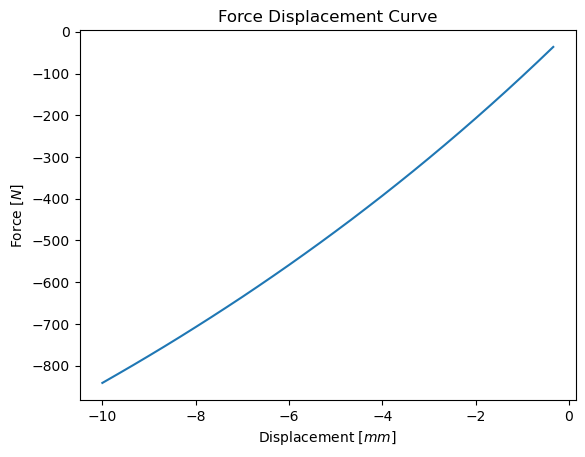

In [173]:
plt.plot(disp_data, force_data)
plt.title("Force Displacement Curve")
plt.xlabel("Displacement $[mm]$")
plt.ylabel("Force $[N]$")
plt.show()

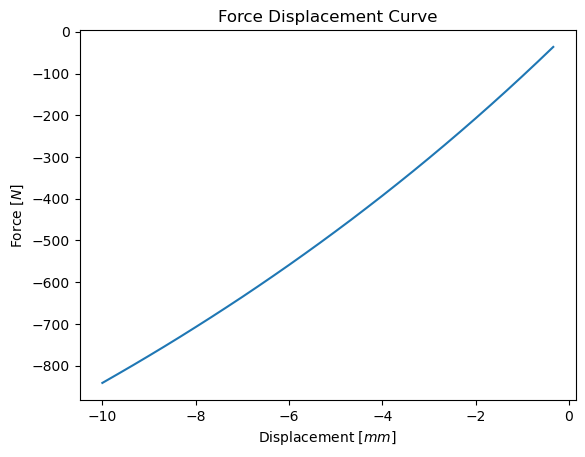

In [174]:
plt.plot(new_disp_data, new_force_data)
plt.title("Force Displacement Curve")
plt.xlabel("Displacement $[mm]$")
plt.ylabel("Force $[N]$")
plt.show()

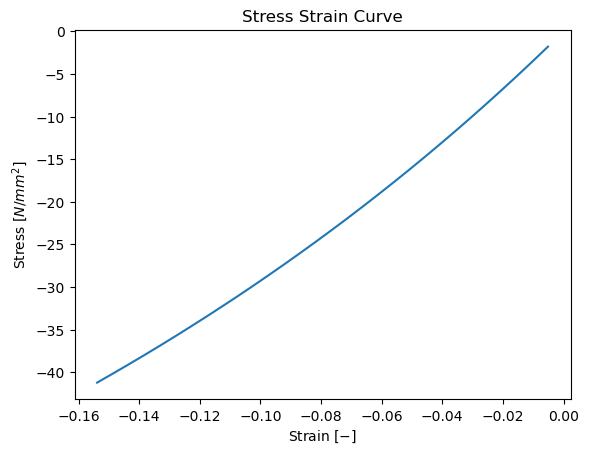

In [175]:
plt.plot(strain, stress)
plt.title("Stress Strain Curve")
plt.xlabel("Strain $[-]$")
plt.ylabel("Stress $[N/mm^2]$")
plt.show()

In [176]:
df.to_csv('stress-strain-PA6-FEA.csv')